<a href="https://colab.research.google.com/github/RorryMiniGunner/PinjemDong/blob/main/06_10_2024_WARMINDO_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Market Basket Analysis**




---



## **1. Import Library**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


## **2. Import Dataset**


In [7]:
df = pd.read_csv('/content/drive/MyDrive/warmindo_free_ngulikdata.csv')
encoding = 'latin-1'
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,id,invoice_id,tanggal_transaksi,customer_id,nama_produk,jenis_produk,kategori_produk,quantity,harga_jual,jenis_pembayaran,jenis_pesanan,nilai_penjualan
0,1,1,4/11/22,44,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,QRIS-OVO,Dine-In,18000
1,2,2,8/1/22,10,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,CASH,Delivery,18000
2,3,3,4/3/22,62,Indomie Rasa Soto Betawi,mie-kuah,makanan,1,10000,QRIS-OTHERS,Delivery,10000
3,4,4,3/19/22,48,Indomie Rasa Soto Padang,mie-kuah,makanan,3,10000,CASH,Dine-In,30000
4,5,5,4/29/22,87,Indomie Rasa Sop Buntut,mie-kuah,makanan,2,10000,QRIS-OVO,Dine-In,20000
...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,495,5/17/22,11,Indomie Baso Sapi,mie-kuah,makanan,1,9000,CASH,Delivery,9000
495,496,496,6/6/22,55,Indomie Goreng Spesial,mie-goreng,makanan,1,9000,QRIS-GOPAY,Delivery,9000
496,497,497,7/14/22,25,Indomie Goreng Rendang,mie-goreng,makanan,2,9000,QRIS-GOPAY,Delivery,18000
497,498,498,8/22/22,39,Indomie Goreng Pedas,mie-goreng,makanan,2,9000,QRIS-DANA,Delivery,18000


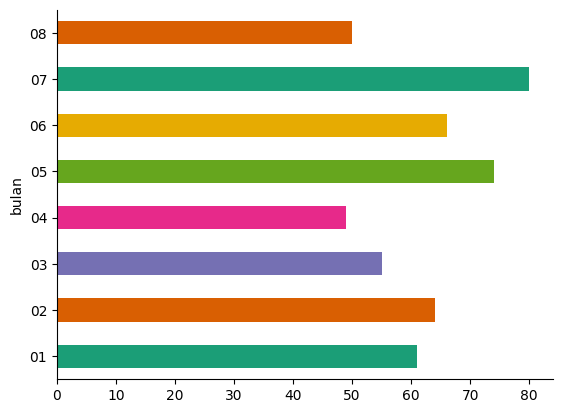

In [ ]:
# @title bulan

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('bulan').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

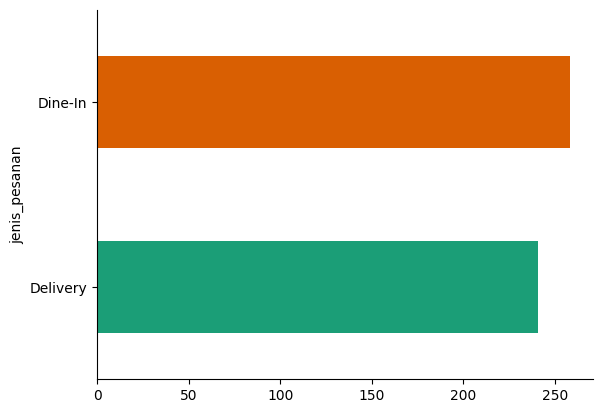

In [ ]:
# @title jenis_pesanan

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('jenis_pesanan').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Dari tabel diatas, menunjukkan jumlah data pada dataset terdapat 500 baris dan 12 kolom

## **3. Data Preparation**


In [8]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 499 non-null    int64 
 1   invoice_id         499 non-null    int64 
 2   tanggal_transaksi  499 non-null    object
 3   customer_id        499 non-null    int64 
 4   nama_produk        499 non-null    object
 5   jenis_produk       499 non-null    object
 6   kategori_produk    499 non-null    object
 7   quantity           499 non-null    int64 
 8   harga_jual         499 non-null    int64 
 9   jenis_pembayaran   499 non-null    object
 10  jenis_pesanan      499 non-null    object
 11  nilai_penjualan    499 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 46.9+ KB
None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# mencetak 10 data pertama
print('First Ten Rows of the DataFrame: \n')
print(df.head(10))

First Ten Rows of the DataFrame: 

   id  invoice_id tanggal_transaksi  customer_id               nama_produk  \
0   1           1           4/11/22           44      Indomie Ayam Spesial   
1   2           2            8/1/22           10      Indomie Ayam Spesial   
2   3           3            4/3/22           62  Indomie Rasa Soto Betawi   
3   4           4           3/19/22           48  Indomie Rasa Soto Padang   
4   5           5           4/29/22           87   Indomie Rasa Sop Buntut   
5   6           6           7/23/22           80      Indomie Ayam Spesial   
6   7           7            2/4/22           15         Indomie Baso Sapi   
7   8           8            1/8/22           94   Indomie Rasa Sop Buntut   
8   9           9            1/3/22            6          Indomie Soto Mie   
9  10          10           6/11/22           86   Indomie Goreng Cabe Ijo   

  jenis_produk kategori_produk  quantity  harga_jual jenis_pembayaran  \
0     mie-kuah         makanan   

In [7]:
print('Unique Items: ', df['nama_produk'].nunique())

Unique Items:  18


In [8]:
print('Unique Items: ', df['jenis_pesanan'].nunique())

Unique Items:  2


In [9]:
print('Unique Items: ', df['jenis_pembayaran'].nunique())

Unique Items:  6


In [10]:
print('Unique Items: ', df['jenis_produk'].nunique())

Unique Items:  2


In [11]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
print('Unique Items: ', df['nama_produk'].nunique())
print( '\n', df['nama_produk'].unique())

Unique Items:  18

 ['Indomie Ayam Spesial' 'Indomie Rasa Soto Betawi'
 'Indomie Rasa Soto Padang' 'Indomie Rasa Sop Buntut' 'Indomie Baso Sapi'
 'Indomie Soto Mie' 'Indomie Goreng Cabe Ijo' 'Indomie Goreng Aceh'
 'Indomie Goreng Sambal Matah' 'Indomie Rasa Mi Kocok Bandung'
 'Indomie Goreng Spesial' 'Indomie Rasa Soto Banjar Limau Kuit'
 'Indomie Goreng Pedas' 'indomie Kari Ayam' 'Indomie Goreng Rendang'
 'indomie Ayam Bawang' 'Indomie Rasa Soto Lamongan'
 'Indomie Rasa Empal Gentong']


In [12]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
print('Unique Items: ', df['jenis_pesanan'].nunique())
print( '\n', df['jenis_pesanan'].unique())

Unique Items:  2

 ['Dine-In' 'Delivery']


In [13]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
print('Unique Items: ', df['jenis_pembayaran'].nunique())
print( '\n', df['jenis_pembayaran'].unique())

Unique Items:  6

 ['QRIS-OVO' 'CASH' 'QRIS-OTHERS' 'QRIS-DANA' 'QRIS-GOPAY' 'QRIS-SHOPEEPAY']


In [14]:
#Mencetak data item yang unik (memiliki nilai item berbeda)
print('Unique Items: ', df['jenis_produk'].nunique())
print( '\n', df['jenis_produk'].unique())

Unique Items:  2

 ['mie-kuah' 'mie-goreng']


In [15]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

id                   0
invoice_id           0
tanggal_transaksi    0
customer_id          0
nama_produk          0
jenis_produk         0
kategori_produk      0
quantity             0
harga_jual           0
jenis_pembayaran     0
jenis_pesanan        0
nilai_penjualan      0
dtype: int64


In [16]:
# cek nilai "NONE" pada kolom nama_produk
print(df[df['nama_produk']=='NONE'])

Empty DataFrame
Columns: [id, invoice_id, tanggal_transaksi, customer_id, nama_produk, jenis_produk, kategori_produk, quantity, harga_jual, jenis_pembayaran, jenis_pesanan, nilai_penjualan]
Index: []


In [17]:
# cek nilai "NONE" pada kolom nama_produk
print(df[df['jenis_pembayaran']=='NONE'])

Empty DataFrame
Columns: [id, invoice_id, tanggal_transaksi, customer_id, nama_produk, jenis_produk, kategori_produk, quantity, harga_jual, jenis_pembayaran, jenis_pesanan, nilai_penjualan]
Index: []


In [18]:
# cek nilai "NONE" pada kolom nama_produk
print(df[df['jenis_pesanan']=='NONE'])

Empty DataFrame
Columns: [id, invoice_id, tanggal_transaksi, customer_id, nama_produk, jenis_produk, kategori_produk, quantity, harga_jual, jenis_pembayaran, jenis_pesanan, nilai_penjualan]
Index: []


In [19]:
# cek nilai "NONE" pada kolom nama_produk
print(df[df['jenis_produk']=='NONE'])

Empty DataFrame
Columns: [id, invoice_id, tanggal_transaksi, customer_id, nama_produk, jenis_produk, kategori_produk, quantity, harga_jual, jenis_pembayaran, jenis_pesanan, nilai_penjualan]
Index: []


In [20]:
# menghapus baris dengan nilai Item = None
df.drop(df[df['nama_produk']=='NONE'].index, inplace=True)

In [21]:
# menghapus baris dengan nilai Item = None
df.drop(df[df['jenis_pesanan']=='NONE'].index, inplace=True)

In [22]:
# menghapus baris dengan nilai Item = None
df.drop(df[df['jenis_pembayaran']=='NONE'].index, inplace=True)

In [23]:
# menghapus baris dengan nilai Item = None
df.drop(df[df['jenis_produk']=='NONE'].index, inplace=True)

In [24]:
# cek perubahan yang terjadi
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 499 non-null    int64 
 1   invoice_id         499 non-null    int64 
 2   tanggal_transaksi  499 non-null    object
 3   customer_id        499 non-null    int64 
 4   nama_produk        499 non-null    object
 5   jenis_produk       499 non-null    object
 6   kategori_produk    499 non-null    object
 7   quantity           499 non-null    int64 
 8   harga_jual         499 non-null    int64 
 9   jenis_pembayaran   499 non-null    object
 10  jenis_pesanan      499 non-null    object
 11  nilai_penjualan    499 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 46.9+ KB
None


In [25]:
# Convert the 'tanggal_transaksi' column to datetime format with the desired format
df['tanggal_transaksi'] = pd.to_datetime(df['tanggal_transaksi'], format='%m/%d/%y').dt.strftime('%d-%m-%Y')
df

,id,invoice_id,tanggal_transaksi,customer_id,nama_produk,jenis_produk,kategori_produk,quantity,harga_jual,jenis_pembayaran,jenis_pesanan,nilai_penjualan
0,1,1,11-04-2022,44,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,QRIS-OVO,Dine-In,18000
1,2,2,01-08-2022,10,Indomie Ayam Spesial,mie-kuah,makanan,2,9000,CASH,Delivery,18000
2,3,3,03-04-2022,62,Indomie Rasa Soto Betawi,mie-kuah,makanan,1,10000,QRIS-OTHERS,Delivery,10000
3,4,4,19-03-2022,48,Indomie Rasa Soto Padang,mie-kuah,makanan,3,10000,CASH,Dine-In,30000
4,5,5,29-04-2022,87,Indomie Rasa Sop Buntut,mie-kuah,makanan,2,10000,QRIS-OVO,Dine-In,20000
...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,495,17-05-2022,11,Indomie Baso Sapi,mie-kuah,makanan,1,9000,CASH,Delivery,9000
495,496,496,06-06-2022,55,Indomie Goreng Spesial,mie-goreng,makanan,1,9000,QRIS-GOPAY,Delivery,9000
496,497,497,14-07-2022,25,Indomie Goreng Rendang,mie-goreng,makanan,2,9000,QRIS-GOPAY,Delivery,18000
497,498,498,22-08-2022,39,Indomie Goreng Pedas,mie-goreng,makanan,2,9000,QRIS-DANA,Delivery,18000


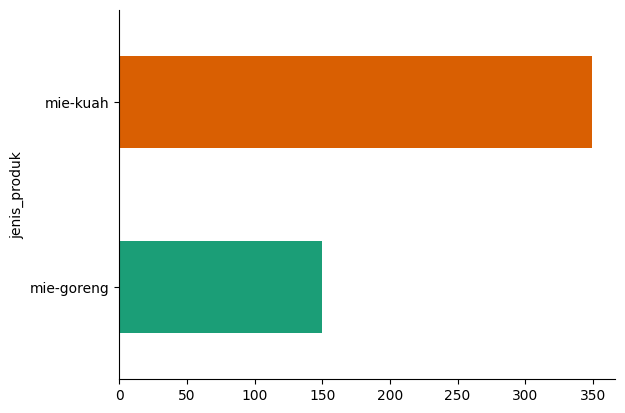

In [ ]:
# @title jenis_produk

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('jenis_produk').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

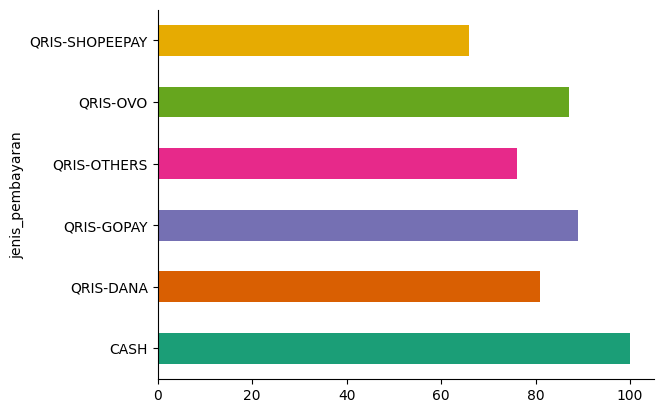

In [ ]:
# @title jenis_pembayaran

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('jenis_pembayaran').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [26]:
# Year (ingat kembali penulisan function lambda)
# Pisahkan kolom tanggal_transaksi berdasarkan Hari, Bulan dan Tahun
#df['Year'] = df['tanggal_transaksi'].apply(lambda x: x.split("-")[2] if len(x.split("-")) > 2 else None)
df[["hari", "bulan", "tahun"]] = df["tanggal_transaksi"].str.split("-", expand=True)
df.sample(5)

,id,invoice_id,tanggal_transaksi,customer_id,nama_produk,jenis_produk,kategori_produk,quantity,harga_jual,jenis_pembayaran,jenis_pesanan,nilai_penjualan,hari,bulan,tahun
399,400,400,27-03-2022,34,indomie Ayam Bawang,mie-kuah,makanan,3,9000,QRIS-GOPAY,Delivery,27000,27,03,2022
321,322,322,11-08-2022,66,Indomie Goreng Aceh,mie-goreng,makanan,2,9000,QRIS-SHOPEEPAY,Delivery,18000,11,08,2022
161,162,162,29-01-2022,47,Indomie Rasa Soto Lamongan,mie-kuah,makanan,1,10000,QRIS-OVO,Dine-In,10000,29,01,2022
376,377,377,06-03-2022,38,Indomie Baso Sapi,mie-kuah,makanan,2,9000,CASH,Delivery,18000,06,03,2022
316,317,317,04-02-2022,22,Indomie Goreng Cabe Ijo,mie-goreng,makanan,1,9000,QRIS-DANA,Dine-In,9000,04,02,2022


In [27]:
# cek kembali perubahan yang terjadi setelah nilai tahun, bulan dan hari ditampung di fitur baru (year, month, day)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 499 non-null    int64 
 1   invoice_id         499 non-null    int64 
 2   tanggal_transaksi  499 non-null    object
 3   customer_id        499 non-null    int64 
 4   nama_produk        499 non-null    object
 5   jenis_produk       499 non-null    object
 6   kategori_produk    499 non-null    object
 7   quantity           499 non-null    int64 
 8   harga_jual         499 non-null    int64 
 9   jenis_pembayaran   499 non-null    object
 10  jenis_pesanan      499 non-null    object
 11  nilai_penjualan    499 non-null    int64 
 12  hari               499 non-null    object
 13  bulan              499 non-null    object
 14  tahun              499 non-null    object
dtypes: int64(6), object(9)
memory usage: 58.6+ KB
None
   id  invoice_id tanggal_transaksi  cus

## **4. Visualisasi dan Memahami Data**
Kita tahu bahwa dataset ini direkam dari 01/01/2022 hingga 08/30/2022. Sebelum kita masuk dalam pemodelan, kita harus mengeksplorasi dan memvisualisasikan penjualan dalam periode waktu ini. Barang apa yang paling banyak dibeli pelanggan? Bulan mana yang lebih sukses? Mari kita jawab ini secara visual.


In [28]:
# Mencetak 20 data penjualan item terbanyak
most_sold = df['nama_produk'].value_counts().head(20)

print('Most Sold Items: \n')
print(most_sold)

Most Sold Items: 

nama_produk
Indomie Rasa Soto Banjar Limau Kuit    41
Indomie Rasa Soto Betawi               40
indomie Kari Ayam                      33
Indomie Rasa Empal Gentong             31
Indomie Goreng Cabe Ijo                31
Indomie Rasa Mi Kocok Bandung          29
Indomie Goreng Pedas                   28
Indomie Rasa Soto Lamongan             28
Indomie Baso Sapi                      26
Indomie Goreng Spesial                 25
Indomie Rasa Sop Buntut                25
Indomie Rasa Soto Padang               25
indomie Ayam Bawang                    25
Indomie Ayam Spesial                   25
Indomie Goreng Aceh                    23
Indomie Goreng Sambal Matah            23
Indomie Soto Mie                       21
Indomie Goreng Rendang                 20
Name: count, dtype: int64


In [29]:
# Mencetak 6 data penjualan item terbanyak
most_use = df['jenis_pembayaran'].value_counts().head(6)

print('Most Payment Use: \n')
print(most_use)

Most Payment Use: 

jenis_pembayaran
CASH              100
QRIS-GOPAY         89
QRIS-OVO           87
QRIS-DANA          81
QRIS-OTHERS        76
QRIS-SHOPEEPAY     66
Name: count, dtype: int64


In [30]:
# Mencetak 6 data penjualan item terbanyak
most_order = df['jenis_pesanan'].value_counts().head(2)

print('Most Order Type: \n')
print(most_order)

Most Order Type: 

jenis_pesanan
Dine-In     258
Delivery    241
Name: count, dtype: int64


In [31]:
# Mencetak 6 data penjualan item terbanyak
most_food_order = df['jenis_produk'].value_counts().head(2)

print('Most Food Order Type: \n')
print(most_food_order)

Most Food Order Type: 

jenis_produk
mie-kuah      349
mie-goreng    150
Name: count, dtype: int64


In [32]:
transaction_count = df.groupby(by='nama_produk')[['invoice_id']].count().sort_values(by='invoice_id', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,invoice_id
nama_produk,
Indomie Rasa Soto Banjar Limau Kuit,8.216433
Indomie Rasa Soto Betawi,8.016032
indomie Kari Ayam,6.613226
Indomie Rasa Empal Gentong,6.212425
Indomie Goreng Cabe Ijo,6.212425


In [33]:
transaction_count = df.groupby(by='jenis_pembayaran')[['invoice_id']].count().sort_values(by='invoice_id', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,invoice_id
jenis_pembayaran,
CASH,20.040080
QRIS-GOPAY,17.835671
QRIS-OVO,17.434870
QRIS-DANA,16.232465
QRIS-OTHERS,15.230461


In [34]:
transaction_count = df.groupby(by='jenis_pesanan')[['invoice_id']].count().sort_values(by='invoice_id', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,invoice_id
jenis_pesanan,
Dine-In,51.703407
Delivery,48.296593


In [35]:
transaction_count = df.groupby(by='jenis_produk')[['invoice_id']].count().sort_values(by='invoice_id', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,invoice_id
jenis_produk,
mie-kuah,69.93988
mie-goreng,30.06012


Text(0.5, 1.0, 'Most Sold Items')

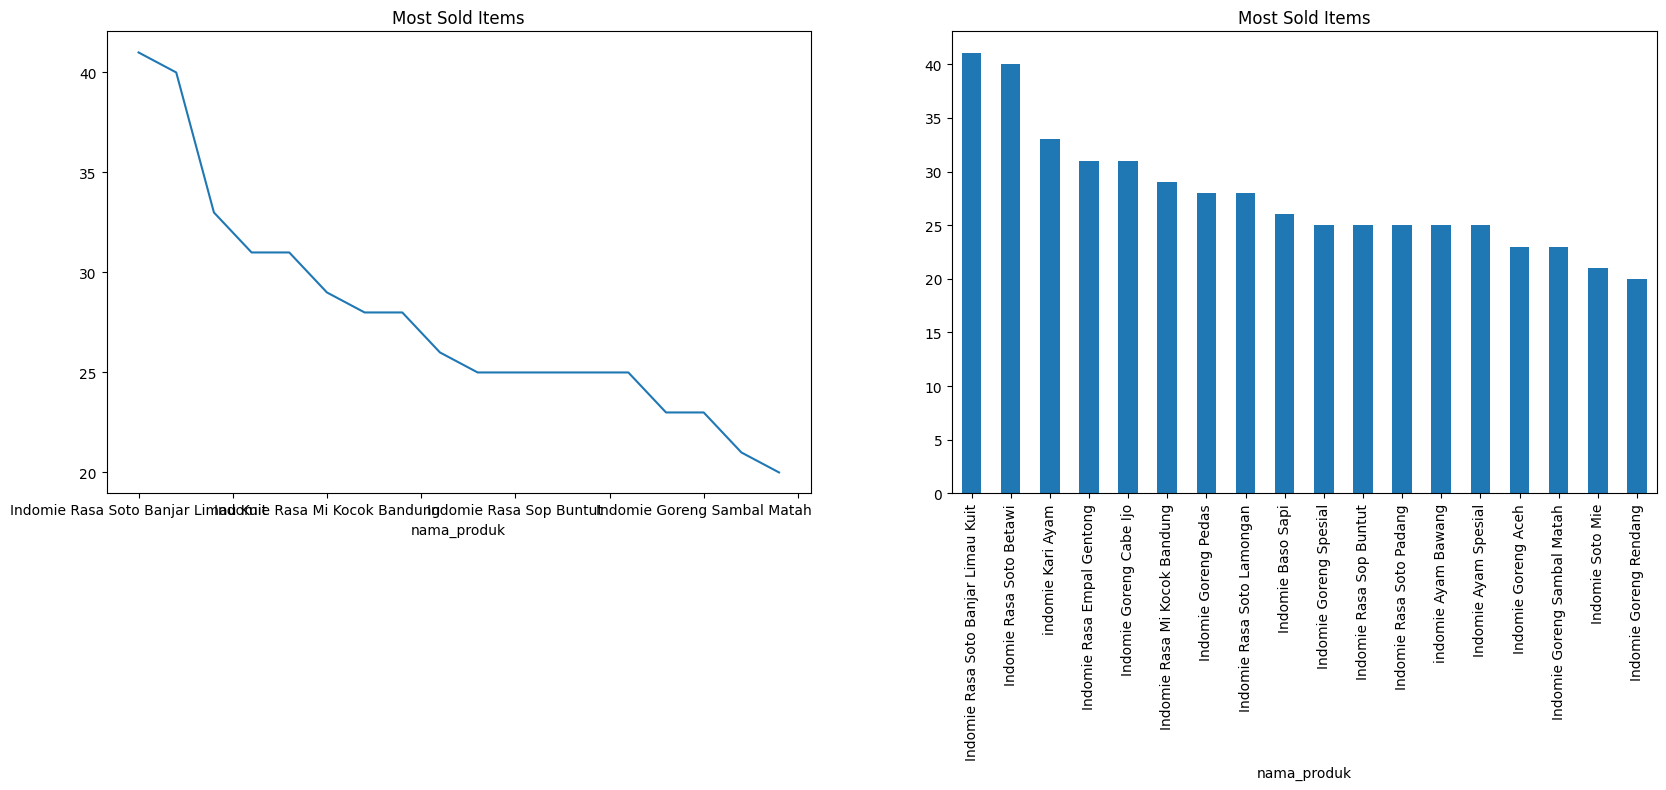

In [35]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_sold)
most_sold.plot(kind='line')
plt.title('Most Sold Items')


plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Most Sold Items')

Text(0.5, 1.0, 'Most Order Type')

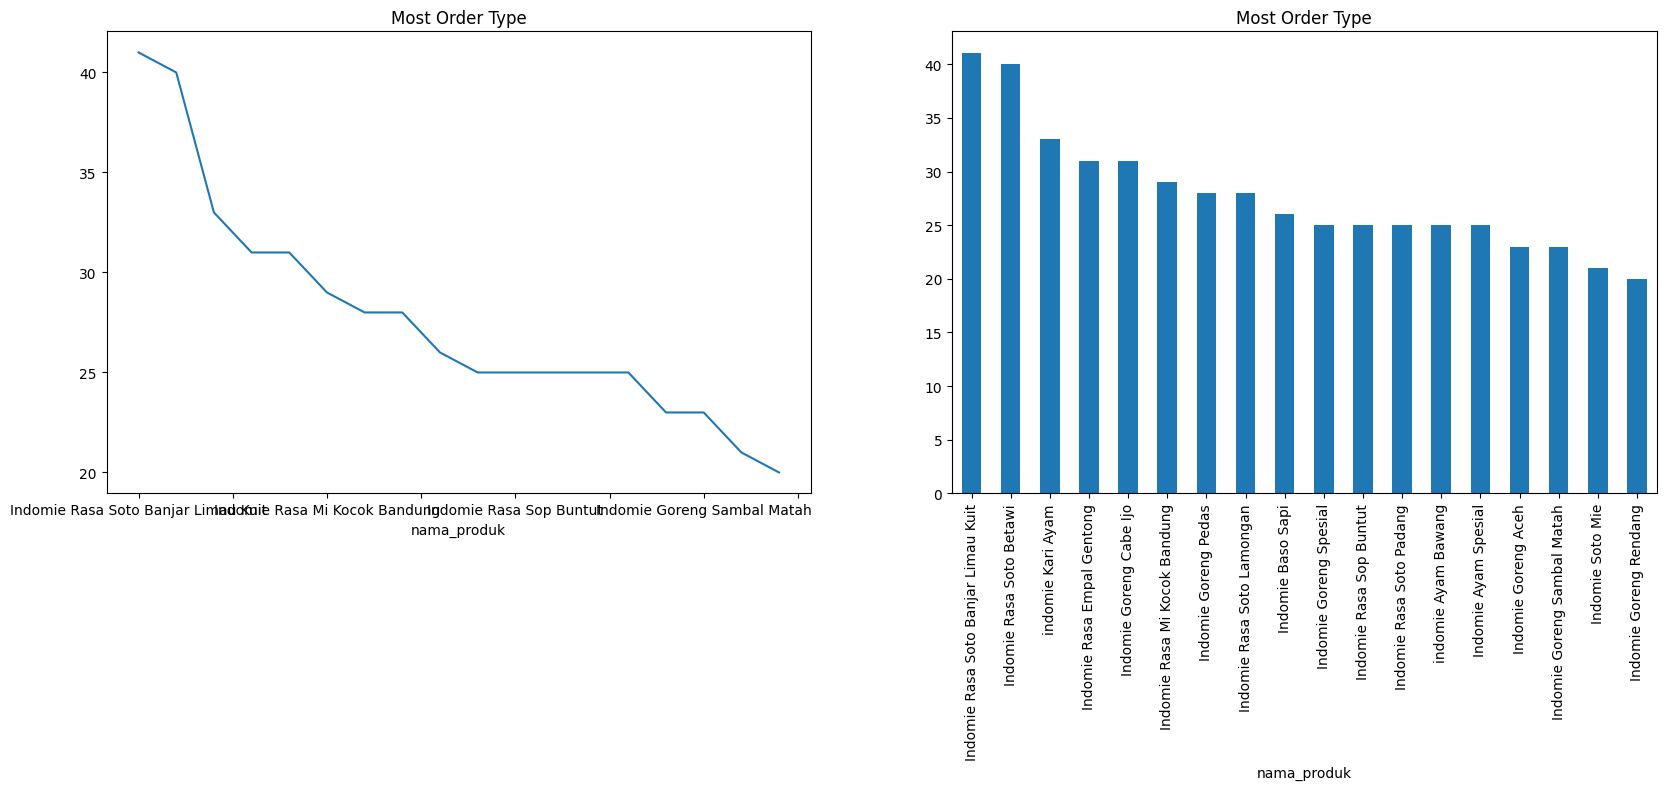

In [36]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_sold)
most_sold.plot(kind='line')
plt.title('Most Order Type')


plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Most Order Type')

Text(0.5, 1.0, 'Most Order Type')

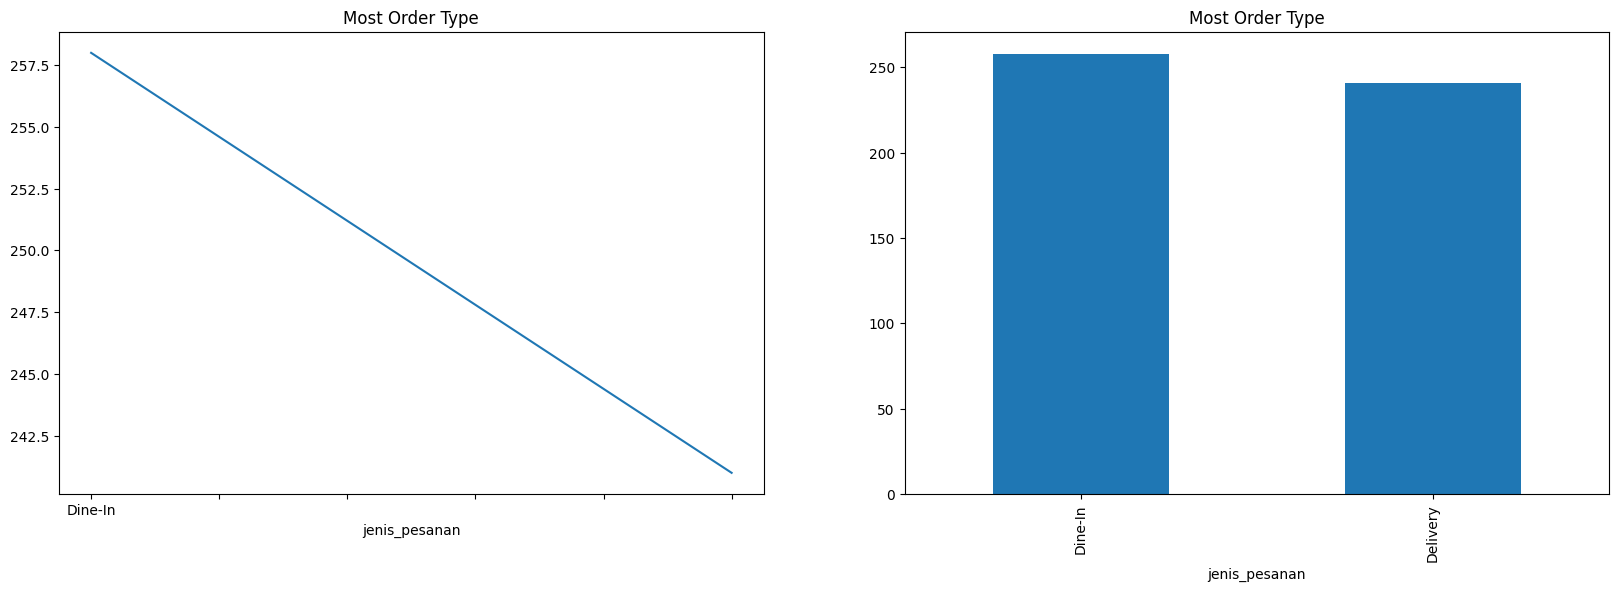

In [38]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_order)
most_order.plot(kind='line')
plt.title('Most Order Type')


plt.subplot(1,2,2)
most_order.plot(kind='bar')
plt.title('Most Order Type')

Text(0.5, 1.0, 'Most Food Order Type')

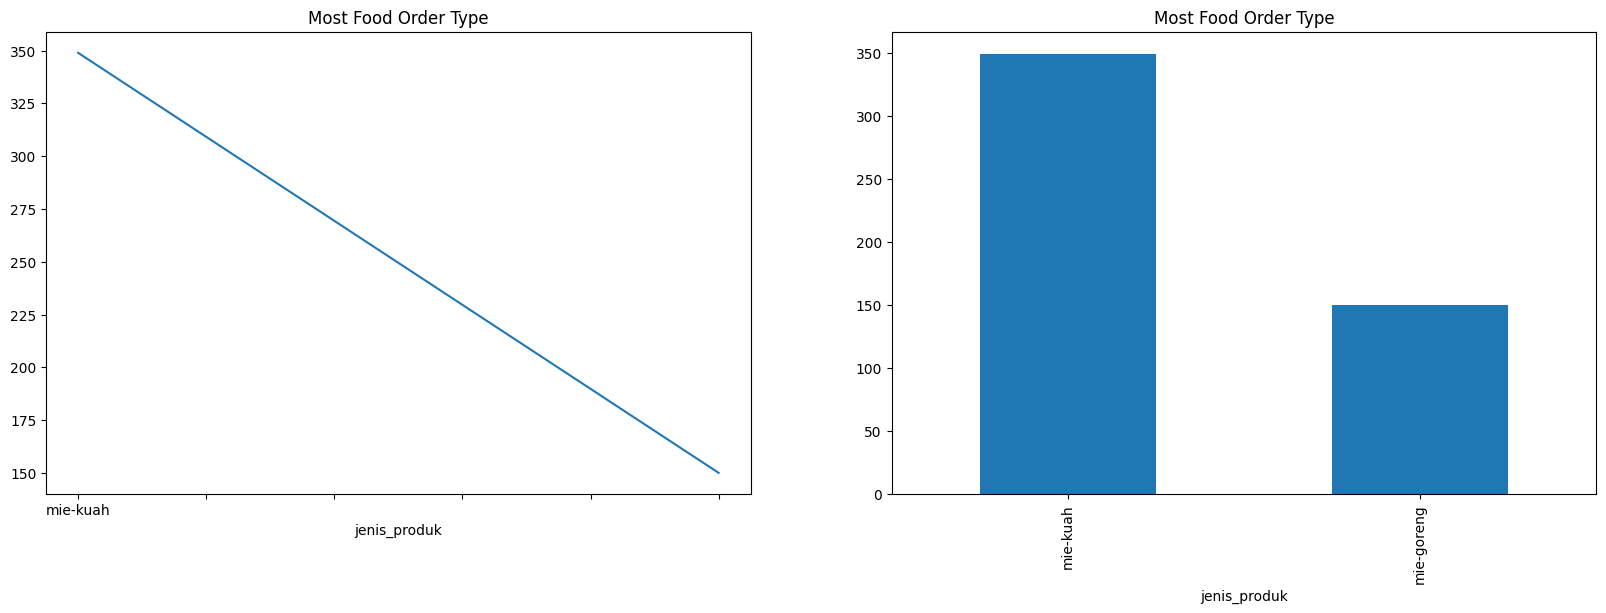

In [37]:
# visualisasikan data penjualan item terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_order)
most_food_order.plot(kind='line')
plt.title('Most Food Order Type')


plt.subplot(1,2,2)
most_food_order.plot(kind='bar')
plt.title('Most Food Order Type')

Berdasarkan hasil visualisasi, kopi adalah barang yang paling banyak terjual, diikuti oleh roti, teh, kue, dan kue kering. Ini masuk akal untuk toko roti. Sekarang setelah kita mengetahui item mana yang paling populer, mari kita lihat bulan mana yang menghasilkan penjualan paling banyak.

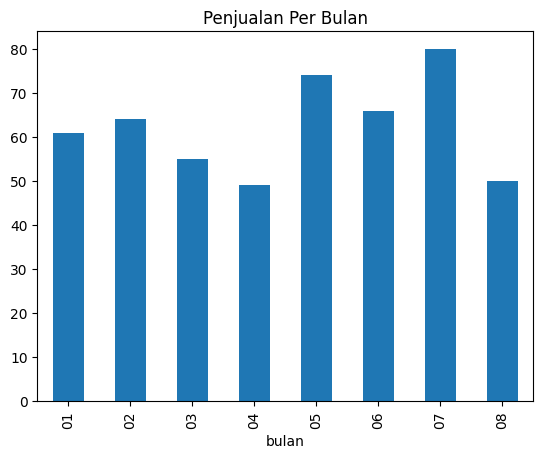

In [ ]:
# Penjualan Per Bulan dari produk pesanan
df.groupby('bulan')['invoice_id'].nunique().plot(kind='bar', title='Penjualan Per Bulan')
plt.show()

Dari hasil visualisasi data penjualan perbulan, terlihat terjadi perbedaan penjualan pada bulan 4 dan bulan 7 ini disebut dengan outlier.
Untuk mengetahui lebih lanjut, kita bisa periksa untuk melihat apakah ada lebih sedikit transaksi harian yang dicatat untuk bulan-bulan ini dibandingkan dengan yang lain.

In [ ]:
print(df.groupby('bulan')['invoice_id'].nunique())

bulan
01    61
02    64
03    55
04    49
05    74
06    66
07    80
08    50
Name: invoice_id, dtype: int64


Berdasarkan data, Penjualan terbanyak di bulan ke 7 sebanyak 80, penjualan paling sedikit di bulan ke 4 dengan 49 untuk warmindo

In [ ]:
# Penjualan Per Bulan dari produk pesanan dari sisi jenis pembayaran
df.groupby('bulan')['invoice_id'][].nunique().plot(kind='bar', title='Penjualan Per Bulan')
plt.show()

## **5. Market Basket Analysis**
memakai Algoritma Apriori

Pertama kita mengubah item list menjadi data transaksi dengan menggunakan TransactionEncoder.
Kita akan menggunakan frequent item-sets untuk menghasilkan aturan asosiasi dengan menggunakan algoritma Apriori.


In [2]:
!pip install -q mlxtend

In [3]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

kita membuat list transaction_list() yang unik sehingga kita dapat mengubah data kita ke dalam format yang benar

In [4]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['tanggal_transaksi'].unique():
    tlist = list(set(df[df['tanggal_transaksi']==i]['nama_produk']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'df' is not defined

kita menggunakan TransactionEncoder untuk merubah bentuk transaction_list()

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Indomie Ayam Spesial,Indomie Baso Sapi,Indomie Goreng Aceh,Indomie Goreng Cabe Ijo,Indomie Goreng Pedas,Indomie Goreng Rendang,Indomie Goreng Sambal Matah,Indomie Goreng Spesial,Indomie Rasa Empal Gentong,Indomie Rasa Mi Kocok Bandung,Indomie Rasa Sop Buntut,Indomie Rasa Soto Banjar Limau Kuit,Indomie Rasa Soto Betawi,Indomie Rasa Soto Lamongan,Indomie Rasa Soto Padang,Indomie Soto Mie,indomie Ayam Bawang,indomie Kari Ayam
0,True,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
204,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


Sekarang kita terapkan Apriori. Kita akan menggunakan parameter min_threshold (nilai ambang batas yang ditentukan) dalam aturan asosiasi untuk metrik lift menjadi 1,0 karena jika kurang dari satu, maka kedua item tersebut kemungkinan tidak akan dibeli bersama. Kita akan mengurutkan nilai berdasarkan keyakinan untuk melihat kemungkinan suatu barang dibeli jika pendahulunya dibeli.

In [ ]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
168,"(Indomie Soto Mie, Indomie Rasa Soto Betawi)",(Indomie Rasa Soto Padang),0.014493,1.000000,8.280000
169,(Indomie Rasa Soto Padang),"(Indomie Soto Mie, Indomie Rasa Soto Betawi)",0.014493,0.120000,8.280000
124,"(Indomie Rasa Soto Betawi, Indomie Rasa Mi Koc...",(Indomie Baso Sapi),0.014493,0.750000,7.056818
129,(Indomie Baso Sapi),"(Indomie Rasa Soto Betawi, Indomie Rasa Mi Koc...",0.014493,0.136364,7.056818
152,(indomie Kari Ayam),"(Indomie Rasa Soto Padang, Indomie Rasa Mi Koc...",0.014493,0.096774,5.008065
...,...,...,...,...,...
83,(Indomie Rasa Empal Gentong),(Indomie Rasa Soto Betawi),0.028986,0.193548,1.054329
50,(Indomie Rasa Soto Padang),(Indomie Goreng Pedas),0.014493,0.120000,1.035000
51,(Indomie Goreng Pedas),(Indomie Rasa Soto Padang),0.014493,0.125000,1.035000
25,(Indomie Baso Sapi),(Indomie Rasa Soto Lamongan),0.014493,0.136364,1.008117


In [ ]:
metrix.sample(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
86,(Indomie Rasa Soto Lamongan),(Indomie Rasa Mi Kocok Bandung),0.135266,0.125604,0.019324,0.142857,1.137363,0.002334,1.020129,0.139665
56,(Indomie Goreng Rendang),(Indomie Rasa Empal Gentong),0.091787,0.149758,0.014493,0.157895,1.054329,0.000747,1.009662,0.056738
154,"(Indomie Rasa Soto Lamongan, Indomie Rasa Soto...",(Indomie Rasa Soto Banjar Limau Kuit),0.028986,0.188406,0.014493,0.500000,2.653846,0.009032,1.623188,0.641791
73,(Indomie Goreng Spesial),(Indomie Rasa Sop Buntut),0.115942,0.115942,0.014493,0.125000,1.078125,0.001050,1.010352,0.081967
105,(Indomie Rasa Soto Betawi),(Indomie Rasa Soto Padang),0.183575,0.120773,0.038647,0.210526,1.743158,0.016476,1.113688,0.522189
95,(Indomie Rasa Soto Banjar Limau Kuit),(Indomie Rasa Sop Buntut),0.188406,0.115942,0.024155,0.128205,1.105769,0.002310,1.014066,0.117857
24,(Indomie Rasa Soto Lamongan),(Indomie Baso Sapi),0.135266,0.106280,0.014493,0.107143,1.008117,0.000117,1.000966,0.009311
45,(Indomie Goreng Spesial),(Indomie Goreng Pedas),0.115942,0.115942,0.019324,0.166667,1.437500,0.005881,1.060870,0.344262
164,(Indomie Rasa Soto Padang),"(Indomie Rasa Soto Lamongan, Indomie Rasa Soto...",0.120773,0.028986,0.014493,0.120000,4.140000,0.010992,1.103426,0.862637
71,(Indomie Goreng Spesial),(Indomie Rasa Mi Kocok Bandung),0.115942,0.125604,0.019324,0.166667,1.326923,0.004761,1.049275,0.278689


In [ ]:
frequent_itemsets = apriori(df2, min_support = 0.05, use_colnames = True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.115942,(Indomie Ayam Spesial)
1,0.106280,(Indomie Baso Sapi)
2,0.106280,(Indomie Goreng Aceh)
3,0.144928,(Indomie Goreng Cabe Ijo)
4,0.115942,(Indomie Goreng Pedas)
5,0.091787,(Indomie Goreng Rendang)
6,0.101449,(Indomie Goreng Sambal Matah)
7,0.115942,(Indomie Goreng Spesial)
8,0.149758,(Indomie Rasa Empal Gentong)
9,0.125604,(Indomie Rasa Mi Kocok Bandung)


## MARKET BASKET ANALYSIS
(analisa dari jenis pembayaran di warmindo)

In [ ]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['tanggal_transaksi'].unique():
    tlist = list(set(df[df['tanggal_transaksi']==i]['jenis_pembayaran']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

207


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CASH,QRIS-DANA,QRIS-GOPAY,QRIS-OTHERS,QRIS-OVO,QRIS-SHOPEEPAY
0,False,True,True,True,True,False
1,True,False,True,False,False,False
2,False,False,False,True,False,False
3,True,False,False,False,False,True
4,False,False,False,True,True,False
...,...,...,...,...,...,...
202,False,False,False,False,False,True
203,False,False,True,False,False,False
204,False,True,False,False,False,False
205,False,False,True,False,False,False


In [ ]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift
182,"(QRIS-OTHERS, QRIS-DANA, QRIS-OVO)","(QRIS-GOPAY, QRIS-SHOPEEPAY)",0.014493,0.600000,8.871429
193,"(QRIS-GOPAY, QRIS-SHOPEEPAY)","(QRIS-OTHERS, QRIS-DANA, QRIS-OVO)",0.014493,0.214286,8.871429
189,"(QRIS-OTHERS, QRIS-OVO)","(QRIS-GOPAY, QRIS-DANA, QRIS-SHOPEEPAY)",0.014493,0.136364,7.056818
186,"(QRIS-GOPAY, QRIS-DANA, QRIS-SHOPEEPAY)","(QRIS-OTHERS, QRIS-OVO)",0.014493,0.750000,7.056818
187,"(QRIS-OTHERS, QRIS-DANA, QRIS-SHOPEEPAY)","(QRIS-GOPAY, QRIS-OVO)",0.014493,0.600000,5.175000
...,...,...,...,...,...
30,(QRIS-OTHERS),"(QRIS-GOPAY, QRIS-DANA)",0.038647,0.121212,1.003636
25,"(QRIS-GOPAY, QRIS-DANA)",(QRIS-OTHERS),0.038647,0.320000,1.003636
1,(CASH),(QRIS-DANA),0.140097,0.333333,1.000000
0,(QRIS-DANA),(CASH),0.140097,0.420290,1.000000


In [ ]:
metrix.sample(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
108,"(QRIS-GOPAY, QRIS-DANA)","(QRIS-OTHERS, QRIS-OVO)",0.120773,0.106280,0.019324,0.160000,1.505455,0.006488,1.063952,0.381868
65,(QRIS-OVO),"(QRIS-OTHERS, QRIS-SHOPEEPAY)",0.362319,0.086957,0.043478,0.120000,1.380000,0.011972,1.037549,0.431818
76,(QRIS-DANA),"(QRIS-OTHERS, QRIS-GOPAY, CASH)",0.333333,0.033816,0.014493,0.043478,1.285714,0.003221,1.010101,0.333333
51,"(QRIS-GOPAY, QRIS-SHOPEEPAY)",(QRIS-OTHERS),0.067633,0.318841,0.038647,0.571429,1.792208,0.017083,1.589372,0.474093
160,"(QRIS-OTHERS, QRIS-GOPAY, QRIS-SHOPEEPAY)",(QRIS-OVO),0.038647,0.362319,0.028986,0.750000,2.070000,0.014983,2.550725,0.537688
45,"(QRIS-GOPAY, QRIS-OVO)",(QRIS-OTHERS),0.115942,0.318841,0.043478,0.375000,1.176136,0.006511,1.089855,0.169399
12,(QRIS-DANA),"(QRIS-GOPAY, CASH)",0.333333,0.125604,0.053140,0.159420,1.269231,0.011272,1.040230,0.318182
114,(QRIS-OVO),"(QRIS-OTHERS, QRIS-GOPAY, QRIS-DANA)",0.362319,0.038647,0.019324,0.053333,1.380000,0.005321,1.015513,0.431818
121,"(QRIS-GOPAY, QRIS-DANA)","(QRIS-OTHERS, QRIS-SHOPEEPAY)",0.120773,0.086957,0.014493,0.120000,1.380000,0.003991,1.037549,0.313187
95,"(QRIS-GOPAY, QRIS-OVO)","(CASH, QRIS-SHOPEEPAY)",0.115942,0.096618,0.014493,0.125000,1.293750,0.003291,1.032436,0.256831


In [ ]:
frequent_itemsets = apriori(df2, min_support = 0.05, use_colnames = True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.420290,(CASH)
1,0.333333,(QRIS-DANA)
2,0.352657,(QRIS-GOPAY)
3,0.318841,(QRIS-OTHERS)
4,0.362319,(QRIS-OVO)
5,0.285024,(QRIS-SHOPEEPAY)
6,0.140097,"(QRIS-DANA, CASH)"
7,0.125604,"(QRIS-GOPAY, CASH)"
8,0.101449,"(QRIS-OTHERS, CASH)"
9,0.188406,"(QRIS-OVO, CASH)"


## **Market Basket Analysis**
Menganalisa dari jenis pesanan (Dine-In dan Delivery)

In [ ]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['tanggal_transaksi'].unique():
    tlist = list(set(df[df['tanggal_transaksi']==i]['jenis_pesanan']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


207


In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Delivery,Dine-In
0,True,True
1,True,False
2,True,False
3,False,True
4,True,True
...,...,...
202,True,False
203,True,False
204,True,False
205,True,False


In [ ]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
frequent_itemsets = apriori(df2, min_support = 0.05, use_colnames = True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.700483,(Delivery)
1,0.748792,(Dine-In)
2,0.449275,"(Dine-In, Delivery)"


## **Market Basket Analysis**
Menganalisa dari jenis Indomie (Mie Kuah dan Mie goreng)

In [10]:
transaction_list = []

# For loop to create a list of the unique transactions throughout the dataset:
for i in df['tanggal_transaksi'].unique():
    tlist = list(set(df[df['tanggal_transaksi']==i]['jenis_produk']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


207


In [11]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
df2 = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
df2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mie-goreng,mie-kuah
0,True,True
1,False,True
2,False,True
3,False,True
4,True,True
...,...,...
202,False,True
203,False,True
204,False,True
205,True,False


In [13]:
frequent_itemsets = apriori(df2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,support,confidence,lift


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
frequent_itemsets = apriori(df2, min_support = 0.05, use_colnames = True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.536232,(mie-goreng)
1,0.893720,(mie-kuah)
2,0.429952,"(mie-kuah, mie-goreng)"


# **Kesimpulan**

Dapat dilihat dari analisis diatas, Dalam penjualan dari bulan Januari hingga Agustus, Warmindo telah menjual indomie dengan rasa sebagai berikut :

*   Indomie Soto Banjar Kulit Limau
*   Indomie Soto Betawi
*   Indomie Empal Gentong
*   Indomie Kari Ayam
*   Indomie Goreng Cabe Ijo

Ini ada 5 rasa indomie yang dijual di warmindo dengan perjualan terbaik dari 18 rasa totalnya. Dengan 4 rasa indomie rebus dan 1 indomie goreng.

Untuk probabilitas hasil dari algoritma apriori dalam Market Basket Analysis, bisa disimpulkan sebagai berikut :

Dilihat dari analisis diatas, di mana semakin tinggi nilai peningkatan, semakin kuat korelasi antar item. Justru korelasi antar item yang dibeli, tidak datang dari rasa indomie soto banjar dan soto betawi yang merupakan rasa terlaris. Berikut penjelasannya (dari 5 nilai terbesar)

> Indomie Kari Ayam & Indomie Baso Sapi -> Indomie Mie Kocok Bandung

> Indomie Kari Ayam -> Indomie Mie Kocok Bandung & Indomie Baso Sapi

> Indomie Soto Lamongan & Soto Betawi -> Indomie Soto Banjar Limau Kuit

> Indomie Ayam Bawang -> Indomie Goreng Pedas

> Indomie Goreng Pedas -> Indomie Ayam Bawang

Penjelasan dari sisi pembayaran (dari 5 nilai terbesar)

> QRIS Others, DANA, OVO -> QRIS Shopee Pay

> QRIS Others, GoPay, OVO -> QRIS Shopee Pay

> QRIS GoPay, Shopee Pay, Cash -> QRIS OVO

> QRIS GoPay, Shopee Pay, others -> QRIS OVO

> QRIS GoPay, Shopee Pay, DANA -> QRIS Shopee Pay dan OVO

Setiap Bisnis, tak terkecuali warmindo, selalu mencari cara untuk terus mengoptimalkan penjualan dan profit. Dengan mengetahui korelasi, hubungan antara produk, pembayaran, tipe indomie yang disukai, dan jenis pesanan makan.
Peletakan produk di etalase merupakan salah satu cara untuk menarik pelanggan seperti menaruh rasa-rasa indomie yang favorit, sering dipesan, dan memberi promo seperti beli 2 rasa tertentu, gratis 1 rasa yang lain. Mungkin bisa menjadi alternatif bagi rasa yang kurang favorit.

Untuk pembayaran, sangat didominasi oleh QRIS dibandingkan Cash (QRIS all merchant 58%, Cash 42%). Bisa juga dibuat promo cashback untuk pembayarannya. Dalam hal di data warmindo ini, Shopee Pay, GoPay, Dana dan others (merchant Bank) menjadi primadona dalam pembayaran.











